In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv("/kaggle/input/dataverse_2023/trainIPAdb_u.csv")
test_df = pd.read_csv("/kaggle/input/dataverse_2023/testData.csv", index_col="row_id_column_name")
sample_submission_df = pd.read_csv("/kaggle/input/dataverse_2023/sample submission.csv")


print("Total number of training samples:", len(train_df))
print("Total number of test samples:", len(test_df))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Total number of training samples: 21999
Total number of test samples: 27228


The number of test samples is approximately **1.25 times** that of the number of training samples!

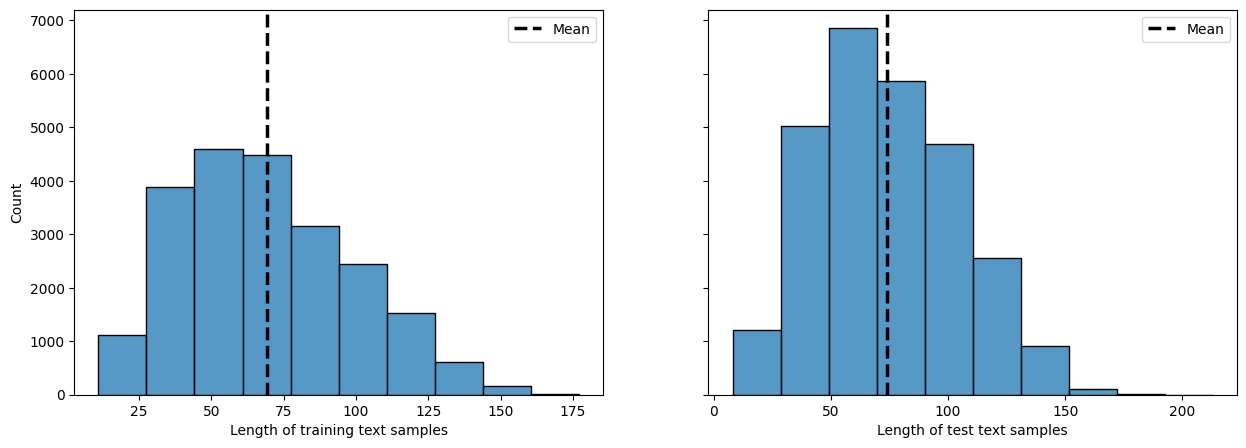

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

train_lengths = train_df["text"].str.len()
sns.histplot(ax=axes[0], data=train_lengths, bins=10).set(xlabel="Length of training text samples")
axes[0].axvline(train_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[0].legend()

test_lengths = test_df["text"].str.len()
sns.histplot(ax=axes[1], data=test_lengths, bins=10).set(xlabel="Length of test text samples")
axes[1].axvline(test_lengths.mean(), c="k", ls="--", lw=2.5, label="Mean")
axes[1].legend()


plt.show()

Now, let's find out the number of unique words in both training and test data.

In [3]:
import re

train_corpus = train_df["text"].sum()
test_corpus = test_df["text"].sum()

# Remove punctuations
chars_to_ignore = '[-,\.:;\'"!\?।]'

train_corpus = re.sub(chars_to_ignore, ' ', train_corpus)
train_vocab = set(train_corpus.split())

test_corpus = re.sub(chars_to_ignore, ' ', test_corpus)
test_vocab = set(test_corpus.split())

oov = test_vocab - train_vocab

print("Number of unique words in training data:", len(train_vocab))
print("Number of unique words in test data:", len(test_vocab))
print("Number of out-of-vocabulary (OOV) words:", len(oov))

Number of unique words in training data: 32608
Number of unique words in test data: 41258
Number of out-of-vocabulary (OOV) words: 23431


In [4]:
# Filtering text samples that contain English alphanumeric values
filtered_train = train_df[lambda x: x["text"].str.contains("[A-Za-z0-9]")]

with pd.option_context('display.max_colwidth', 0):
    display(filtered_train.tail(n=10))

,text,ipa
12638,এরপর ডাউনলোড লিংক জেনারেট হলে click here to download বাটন দেখাবে।,eɾpɔɾ dɐu̯nlod lɪŋk ɟenɐɾet hole bɐton d̪ekʰɐbe।
13013,তারপর সেখানে Canned Response অপশনে গিয়ে New Canned Response-এ ক্লিক করে একটি নাম টাইপ করলেও খসড়া মেইলটি সংরক্ষিত হয়ে যাবে।,t̪ɐɾpɔɾ ʃekʰɐne ɔpʃone gɪʲe -e klɪk koɾe ektɪ nɐm tɐɪ̯p koɾleo̯ kʰɔʃɽɐ meɪltɪ ʃɔŋɾokkʰɪt̪o hoʲe ɟɐbe।
13797,সেই সঙ্গে প্রতিষ্ঠানের বিজ্ঞাপনের স্লোগান #dontcrackunderpressure যুক্ত করেন।,ʃeɪ̯ ʃɔŋge pɾot̪ɪʃtʱɐneɾ bɪggɐponeɾ slogɐn
15195,চূড়ান্তভাবে উত্তীর্ণ পরীক্ষার্থীদের ফলাফল http://bou.ac.bd এবং সেমিস্টারভিত্তিক ফলাফল http:// exam.bou.edu.bd পাওয়া যাবে।,cuɽɐnt̪obʱɐbe ut̪t̪ɪɾno poɾɪkkʰɐɾt̪ʰɪd̪eɾ pʰɔlɐpʰɔl ://.. eboŋ ʃemɪstɐɾobʱɪt̪t̪ɪk pʰɔlɐpʰɔl :// ... pɐo̯ʷɐ ɟɐbe।
15352,ভর্তিসংক্রান্ত বিস্তারিত তথ্য বিশ্ববিদ্যালয়ের ওয়েবসাইট www.bsmrau.edu.bd থেকে দেখা যাবে।,bʱɔɾt̪ɪʃɔŋkɾɐnt̪o bɪst̪ɐɾɪt̪o t̪ot̪t̪ʰo bɪʃʃobɪd̪d̪ɐlɔʲeɾ oʷebʃɐɪ̯t ... t̪ʰeke d̪ɛkʰɐ ɟɐbe।
15527,এ ব্যাপারে বিস্তারিত তথ্য জাতীয় বিশ্ববিদ্যালয়ের ওয়েবসাইটে www.nu.edu.bd রয়েছে।,e bɛpɐɾe bɪst̪ɐɾɪt̪o t̪ot̪t̪ʰo ɟɐt̪ɪʲo bɪʃʃobɪd̪d̪ɐlɔʲeɾ oʷebʃɐɪ̯te ... ɾoʲecʰe।
16119,আবেদনসহ ভর্তি প্রক্রিয়া সম্পর্কিত বিস্তারিত তথ্য বিশ্ববিদ্যালয়ের ওয়েবসাইট http://admission.ru. ac.bd-তে পাওয়া যাবে।,ɐbed̪ɔnʃɔho bʱɔɾt̪ɪ pɾokɾɪʲɐ ʃɔmpoɾkɪt̪o bɪst̪ɐɾɪt̪o t̪ot̪t̪ʰo bɪʃʃobɪd̪d̪ɐlɔʲeɾ oʷebʃɐɪ̯t ://.. .-t̪e pɐo̯ʷɐ ɟɐbe।
19350,ঢাকা মহানগরী ও এর আওতাধীন এলাকাগুলোর ভোটার নিবন্ধনের সময়সূচি নির্বাচন কমিশনের ওয়েবসাইট www.ecs.gov.bd তে পাওয়া যাবে।,dʱɐkɐ mɔhɐngoɾɪ o eɾ ɐo̯t̪ɐd̪ʱɪn elɐkɐguloɾ bʱotɐɾ nɪbɔnd̪ʱoneɾ ʃɔmɔe̯ʃucɪ nɪɾbɐcɔn kɔmɪʃoneɾ oʷebʃɐɪ̯t ... t̪e pɐo̯ʷɐ ɟɐbe।
19767,প্রার্থীদের www.joinbangladesharmy.mil.bd অথবা http://army.teletalk.com.bd এই ওয়েবসাইটে ঢুকে আবেদন ফরম পূরণ করতে হবে।,pɾɐɾt̪ʰɪd̪eɾ ... ɔt̪ʰobɐ ://... eɪ̯ oʷebʃɐɪ̯te dʱuke ɐbed̪ɔn pʰɔɾom puɾon koɾt̪e hɔbe।
20981,"তাছাড়া, সোডিয়াম নাইট্রাইটের মত পদার্থ, Msg, সংরক্ষক, কৃত্রিম রং ইত্যাদি উপাদান শুধুমাত্র স্থূলতা বাড়ায় যা শক্তি নিঃশেষিত করে।","t̪ɐcʰɐɽɐ, sodɪʲɐm nɐɪ̯tɾɐɪ̯teɾ mɔt̪ pɔd̪ɐɾt̪ʰo, , ʃɔŋɾɔkkʰok, kɾɪt̪ɾɪm ɾɔŋ ɪt̪t̪ɐd̪ɪ upɐd̪ɐn শুধু st̪ʰulɔt̪ɐ bɐɽɐe̯ ɟɐ ʃokt̪ɪ nɪʃʃeʃɪt̪o koɾe।"


In [5]:
bangla_numerals = "[০১২৩৪৫৬৭৮৯]"

filtered_train = train_df[lambda x: x["text"].str.contains(bangla_numerals)]
filtered_test = test_df[lambda x: x["text"].str.contains(bangla_numerals)]

print("Number of training samples containing Bangla numerals:", len(filtered_train))
print("Number of test samples containing Bangla numerals:", len(filtered_test))

Number of training samples containing Bangla numerals: 0
Number of test samples containing Bangla numerals: 9602


In [6]:
with pd.option_context('display.max_colwidth', 0):
    display(filtered_test.tail(n=10))

,text
row_id_column_name,
12216,আপিল দাখিল ১৩-১৫ মে এবং আপিল নিষ্পত্তি ১৬-১৮ মে।
12217,এ সময় তার কাছ থেকে ১টি দেশীয় এলজি ও ২টি কার্তুজ উদ্ধার করা হয়।
12218,"জানা গেছে, শুধু ভারতে ‘দঙ্গল’-এর হিন্দি সংস্করণের মুনাফার পরিমাণ ৩২০ কোটি ১৬ লাখ রুপি।"
12220,শুধু ৩ নম্বর ঘাট দিয়ে জরুরি ভিত্তিতে কিছু যানবাহন পারাপার হচ্ছে।
12221,ছিনতাইকারীরা এ সময় ২ লাখ ২০ হাজার টাকা ছিনিয়ে নেয়।
12222,সাকিবের আগে টি ২০তে এই ‘ডাবল’ ছিল শুধু শহীদ আফ্রিদির।
12224,"দক্ষিণ কেরানীগঞ্জ থানার ওসি মনিরুল ইসলাম জানান, রাত ১টার দিকে অগ্নিকাণ্ডের ঘটনা ঘটে।"
12225,এতদিন এককভাবে শীর্ষে থাকলেও এখন ঢাকা আবাহনীও তাদের সঙ্গে সমান ৪২ পয়েন্টে দাঁড়িয়ে।
12226,আর ফেরিঙ্গা ১৯৫১ সালে নেদারল্যান্ডসে জš§গ্রহণ করেন।


## Key Takeaways

- **More than 50%** of the words in the test data are out of vocabulary (OOV).
- **English alphanumeric values** are simply **ignored** in IPA transcription.
- **Almost 30% of the test samples** contain Bengali numerals (সংখ্যা), while such samples are not found in the training set.

## Preprocess Data

In [7]:
def show_common_words(df):
    different_word_count = 0

    for index, row in df.iterrows():
        bangla_sentence = re.sub(chars_to_ignore, ' ', row['text'])
        ipa = re.sub(chars_to_ignore, ' ', row['ipa'])

        # Count words in each sentence
        bangla_word_count = len(bangla_sentence.split())
        ipa_word_count = len(ipa.split())

        # Check if the word counts are different
        if bangla_word_count != ipa_word_count:
            different_word_count += 1
            print(f'{bangla_sentence} --> {ipa}')

    print(f'Total rows with different word counts: {different_word_count}')

In [8]:
def preprocess_data(df):
    for index, row in df.iterrows():
        bangla_sentence = re.sub(chars_to_ignore, ' ', row['text'])
        ipa = re.sub(chars_to_ignore, ' ', row['ipa'])
        
        bangla_words = bangla_sentence.split()
        ipa_words = ipa.split()

        # Find common words
        common_words = set(bangla_words) & set(ipa_words)
        if common_words:
            print(common_words)
            # Replace common words with empty string
            df.at[index, 'text'] = ' '.join([word if word not in common_words else '' for word in bangla_words])
            df.at[index, 'ipa'] = ' '.join([word if word not in common_words else '' for word in ipa_words])
    
    return df

In [9]:
train_df_v1 = preprocess_data(train_df)
show_common_words(train_df_v1)

{'seen', 'Test'}
{'যেমন'}
{'ঘুড়ির'}
{'”'}
{'B'}
{'চারদিকে'}
{'মাদক'}
{'সে', 'তে'}
{'মৃত্যু'}
{'উঠান'}
{'নৌ'}
{'শিক্ষা'}
{'উদ্ধার'}
{'ক্রীড়া'}
{'হতেও', 'ঘটতে'}
{'পালন'}
{'বাড়ির'}
{'ক্রিকেট'}
{'ছেলের'}
{'পল্টু'}
{'চেক'}
{'সে'}
{'ক্রীড়া'}
{'মৃত্যু'}
{'উর', 'রশিদ'}
{'গ্যাস'}
{'সভা'}
{'যাবে'}
{'শরীরী'}
{'ক্রিকেট'}
{'অঙ্গ'}
{'সভা'}
{'আঘাত'}
{'রূপসী'}
{'আজ'}
{'//'}
{'পেশার'}
{'মুমিনুল'}
{'ইস্ট'}
{'যাচ্ছে'}
{'মিরেরময়দানস্থ'}
{'যেমন'}
{'খেলোয়াড়'}
{'রেডিও'}
{'যেমন'}
{'পেশার'}
{'লীগ'}
{'কর্তা'}
{'লেখা'}
{'কেনিয়ার'}
{'উদ্বোধন'}
{'বিশ্বের'}
{'‘'}
{'নতুন'}
{'যেমন'}
{'/মরে', '/'}
{'শুরু'}
{'রোনাল্ডো'}
{'আর'}
{'রোনাল্ডোবিহীন'}
{'পেশার'}
{'িহ্নত'}
{'আবার', 'আগের'}
{'দ্রিস', 'ছে'}
আজ তোমাদের জন্য ইংরেজি প্রথমপত্রের Part I Gi  passage এবং Part II Gi Writing  অংশের সাজেশন দেয়া হল --> ɐɟ t̪omɐd̪eɾ ɟonno ɪŋɾeɟɪ pɾot̪ʰompɔt̪ɾeɾ  pɐssɐge eboŋ Wɾɪtɪng  ɔŋʃeɾ ʃɐɟeʃon d̪eʲɐ hɔl
পুরাতন ট্রাক স্ট্যান্ডে হায়দার মোল্যার মেশিনারিজ যন্ত্রাংশের একটি দোকান রয়েছে  --> puɾɐt̪ɔn tɾɐk stɐnde hɐʲd̪ɐɾ মোল্লার meʃɪnɐɾɪz meʃɪnɐ

In [10]:
# Remove English alphanumeric values
alpha_pat = "[a-zA-z0-9]"

train_df["text"] = train_df["text"].str.replace(alpha_pat, "", regex=True)
test_df["text"] = test_df["text"].str.replace(alpha_pat, "", regex=True)

In [11]:
train_df = train_df_v1

# Training

We can frame our problem as a text-to-text generation challenge. Therefore, we can employ any text-to-text models suitable for our task. For this project, we have chosen to use [mT5: A massively multilingual pre-trained text-to-text transformer](https://arxiv.org/abs/2010.11934) and fine-tune it on our dataset. However, feel free to explore and experiment with other text-to-text models that you find suitable. Another alternative is [BanglaT5](https://huggingface.co/csebuetnlp/banglat5) developed by the **BUET CSE NLP Group**.

In [12]:
# For calculating WER (Word Error Rate)
! pip install jiwer

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(train_df, test_size=0.1, shuffle=True, random_state=3000)
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

In [14]:
from datasets import Dataset

ds_train = Dataset.from_pandas(train_df)
ds_eval = Dataset.from_pandas(val_df)

In [15]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq

model_id = "google/mt5-base"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSeq2SeqLM.from_pretrained(model_id)
data_collator = DataCollatorForSeq2Seq(tokenizer)

You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. If you see this, DO NOT PANIC! This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
/opt/conda/lib/python3.10/site-packages/transformers/convert_slow_tokenizer.py:473: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(


In [16]:
def prepare_dataset(sample):
    output = tokenizer(sample["text"])
    output["labels"] = tokenizer(sample["ipa"])['input_ids']
    output["length"] = len(output["labels"])
    return output


ds_train = ds_train.map(prepare_dataset, remove_columns=ds_train.column_names)
ds_eval = ds_eval.map(prepare_dataset, remove_columns=ds_eval.column_names)

  0%|          | 0/19799 [00:00<?, ?ex/s]

  0%|          | 0/2200 [00:00<?, ?ex/s]

In [17]:
import numpy as np
from datasets import load_metric

wer_metric = load_metric("wer")


def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    if isinstance(preds, tuple):
        preds = preds[0]
    
    preds = np.where(preds != -100, preds, tokenizer.pad_token_id)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)

    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    result = wer_metric.compute(predictions=decoded_preds, references=decoded_labels)
    return {"wer": result}

In [18]:
from transformers import Seq2SeqTrainer, Seq2SeqTrainingArguments

model_id = "mt5-base-bangla-text-to-ipa"

training_args = Seq2SeqTrainingArguments(
    output_dir=model_id,
    group_by_length=True,
    length_column_name="length",
    per_device_train_batch_size=4,
    per_device_eval_batch_size=16,
    evaluation_strategy="steps",
    metric_for_best_model="wer",
    greater_is_better=False,
    load_best_model_at_end=True,
    num_train_epochs=8,
    save_steps=8000,
    eval_steps=4000,
    logging_steps=4000,
    learning_rate=3e-4,
    weight_decay=1e-2,
    warmup_steps=2000,
    save_total_limit=1,
    predict_with_generate=True,
    generation_max_length=128,
    push_to_hub=False,
    report_to="none",
)

In [19]:
trainer = Seq2SeqTrainer(
    model=model,
    tokenizer=tokenizer,
    args=training_args,
    train_dataset=ds_train,
    eval_dataset=ds_eval,
    data_collator=data_collator,
    compute_metrics=compute_metrics
)

trainer.train()

You're using a T5TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss,Validation Loss,Wer
4000,1.674500,0.106464,0.109396
8000,0.136100,0.085157,0.082090
12000,0.083800,0.055217,0.053723
16000,0.058900,0.048470,0.043292
20000,0.042500,0.045529,0.039900
24000,0.031100,0.044297,0.036762
28000,0.022200,0.043702,0.033624
32000,0.016800,0.044196,0.030699
36000,0.012400,0.045735,0.030614


TrainOutput(global_step=39600, training_loss=0.21081752863797273, metrics={'train_runtime': 13852.7076, 'train_samples_per_second': 11.434, 'train_steps_per_second': 2.859, 'total_flos': 1.2242654441791488e+16, 'train_loss': 0.21081752863797273, 'epoch': 8.0})

In [20]:
trainer.save_model(model_id)

# Inference

In [21]:
# Sort by length
index = test_df["text"].str.len().sort_values(ascending=False).index
test_df = test_df.reindex(index)

In [ ]:
df_num = pd.read_csv('/kaggle/input/bengali-numbers/nums.csv')

'''
** check if a given num is a bengali number or not
'''
def isNumber(num: str)->bool:
    valid_digits = ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
    for digit in num:
        if digit not in valid_digits:
            return False
    return True


def getValue(dig: str)->str:
    if len(dig)>2:
        raise Exception('Only supports numbers from 00 to 99')
    if len(dig)==1:
        dig = '০'+dig
    res = df_num[df_num['num_bn']==dig]
    ans = res['word_bn'].values[0]
    return ans


'''
    **length of num should be less than 10
    **set dig_by_dig=True to get digit by digit convertion
'''
def processNum(num:str, dig_by_dig:bool=False)->str:
    if not isNumber(num):
        raise Exception(f'{num} contains illegal character(s). Num should only contain ০-৯')
    ans = ''
    if dig_by_dig:
        for dig in num:
            ans += getValue(dig)+' '
        return ans
    if len(num)>9:
        raise Exception('Number too large Pls edit function\
                         to make it work for larger numbers (>9 digits)')
    '''
    len>7 means 'কোটি'
    len>5 means 'লক্ষ'
    len>7 means 'হাজার'
    len>5 means 'শো'
    '''
    base = ['কোটি', 'লক্ষ', 'হাজার', 'শো']
    num_len = [7, 5, 3, 2]
    for i, l in enumerate(num_len):
        if len(num)>l:
            val = getValue(num[:-l])
            num = num[-l:]
            if val!='শুন্য':
                ans += val+base[i]+' '
    val = getValue(num)
    if val!='শুন্য':
        ans += val
    return ans if ans!='' else 'শুন্য'




In [4]:
import pandas as pd
import re

bangla_numerals = ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']

pattern = rf"[{''.join(bangla_numerals)}]+"

test_df = pd.read_csv("/kaggle/input/dataverse_2023/testData.csv")

def split_decimal(num):
    whole, fraction = num.split('.')
    full_num_in_words = processNum(whole) + ' দশমিক ' + processNum(fraction, dig_by_dig=True)
    return full_num_in_words

def process_and_replace(matching_sequences, text):
    for sequence in matching_sequences:
        if '.' in sequence:
            processed_value = split_decimal(sequence)
        elif len(sequence) > 9:
            processed_value = processNum(sequence, dig_by_dig=True)
        else:
            processed_value = processNum(sequence)
        text = re.sub(re.escape(sequence), processed_value, text)
    return text

test_df["text"] = test_df["text"].apply(lambda x: process_and_replace(re.findall(pattern, x), x))

output_file = 'output.csv'
test_df.to_csv(output_file, index=False, columns=['row_id_column_name', 'text'])


NameError: name 'processNum' is not defined

In [20]:
import pandas as pd
import re
df_num = pd.read_csv('/kaggle/input/bengali-numbers/nums.csv')
bangla_numerals = ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯', '.']


test_df = pd.read_csv("/kaggle/input/dataverse_2023/testData.csv")
pattern = rf"[{''.join(bangla_numerals)}]+"
def isNumber(num: str)->bool:
    valid_digits = ['০', '১', '২', '৩', '৪', '৫', '৬', '৭', '৮', '৯']
    for digit in num:
        if digit not in valid_digits:
            return False
    return True
def getValue(dig: str)->str:
    if len(dig)>2:
        raise Exception('Only supports numbers from 00 to 99')
    if len(dig)==1:
        dig = '০'+dig
    res = df_num[df_num['num_bn']==dig]
    ans = res['word_bn'].values[0]
    return ans
def split_decimal(num):
    print(num)
    whole, fraction = num.split('.')
    print()
    full_num_in_words = processNum(whole) + ' দশমিক ' + processNum(fraction, dig_by_dig=True)
    return full_num_in_words
def processNum(num:str, dig_by_dig:bool=False)->str:
    if not isNumber(num):
        raise Exception(f'{num} contains illegal character(s). Num should only contain ০-৯')
    ans = ''
    if dig_by_dig:
        for dig in num:
            ans += getValue(dig)+' '
        return ans
    if len(num)>9:
        raise Exception('Number too large Pls edit function\
                         to make it work for larger numbers (>9 digits)')
    '''
    len>7 means 'কোটি'
    len>5 means 'লক্ষ'
    len>7 means 'হাজার'
    len>5 means 'শো'
    '''
    base = ['কোটি', 'লক্ষ', 'হাজার', 'শো']
    num_len = [7, 5, 3, 2]
    for i, l in enumerate(num_len):
        if len(num)>l:
            val = getValue(num[:-l])
            num = num[-l:]
            if val!='শুন্য':
                ans += val+base[i]+' '
    val = getValue(num)
    if val!='শুন্য':
        ans += val
    return ans if ans!='' else 'শুন্য'
def process_and_replace(matching_sequences, text):
    for sequence in matching_sequences:
        if '.' in sequence:
            processed_value = split_decimal(sequence)
        elif len(sequence) > 9:
            processed_value = processNum(sequence, dig_by_dig=True)
        else:
            print(sequence)
            processed_value = processNum(sequence)
            print(processed_value)
        text = re.sub(re.escape(sequence), processed_value, text)
    return text
# test_df["text"] = test_df["text"].apply(lambda x: process_and_replace(re.findall(pattern, x), x))

# output_file = 'numerals_to_text.csv'
# test_df(output_file, index=False, columns=['row_id_column_name', 'text'])
# # Your input text
text = "ওয়ার্নার পার্কে বুধবার ক্যারিবিয়ান প্রিমিয়ার লীগের ম্যাচে দুই ইনিংস মিলিয়ে ১৮.২ ওভারে উঠেছে ২৫০ রান! দেখা গেছে ছক্কার বৃষ্টি।"
# # text = "২৭নং ওয়ার্ডের কাউন্সিলর আনোয়ারুল আমীন জানান, মাহাতাবকে গাছ কাটার অনুমতি কে দিয়েছে তা আমার জানা নেই।"

# Find matching sequences
matching_sequences = re.findall(pattern, text)

# Call process_and_replace on the input text
updated_text = process_and_replace(matching_sequences, text)

# Print the updated text
print(updated_text)

১৮.২

২৫০
দুইশো পঞ্চাশ
ওয়ার্নার পার্কে বুধবার ক্যারিবিয়ান প্রিমিয়ার লীগের ম্যাচে দুই ইনিংস মিলিয়ে আঠার দশমিক দুই  ওভারে উঠেছে দুইশো পঞ্চাশ রান! দেখা গেছে ছক্কার বৃষ্টি।


In [23]:
import re
import pandas as pd

bangla_numerals =     ["শূন্য", "এক", "দুই", "তিন", "চার", "পাঁচ", "ছয়", "সাত", "আট", "নয়", "দশ",
                      "এগার", "বার", "তের", "চৌদ্দ", "পনের", "ষোল", "সতের", "আঠার", "ঊনিশ", "বিশ",
                      "একোশ", "বাইশ", "তেইশ", "চব্বিশ", "পঁচিশ", "ছাব্বিশ", "সাতাশ", "আটাশ", "ঊনত্রিশ", "ত্রিশ",
                      "একত্রিশ", "বত্রিশ", "তেত্রিশ", "চৌত্রিশ", "পয়ত্রিশ", "ছত্রিশ", "সতত্রিশ", "আটত্রিশ", "ঊনচল্লিশ", "চল্লিশ",
                      "একচল্লিশ", "বেয়াল্লিশ", "তেতাল্লিশ", "চোয়াল্লিশ", "পঁয়তাল্লিশ", "ছেচল্লিশ", "সতচ্ল্লিশ", "আটচল্লিশ", "ঊনপঞ্চাশ", "পঞ্চাশ",
                      "একান্ন", "বাহান্ন", "তেপান্ন", "চোয়ান্ন", "পঁঞ্চান্ন", "ছাপ্পান্ন", "সাতান্ন", "আটান্ন", "ঊনষাট", "ষাট",
                      "একষট্টি", "বাষট্টি", "তেষট্টি", "চৌষট্টি", "পঁয়ষট্টি", "ছেষট্টি", "সতাষট্টি", "আটষট্টি", "ঊনসত্তর", "সত্তর",
                      "একাত্তর", "বাহাত্তর", "তেহাত্তর", "চোয়াত্তর", "পঁচাত্তর", "ছিয়াত্তর", "সাতাত্তর", "আটাত্তর", "ঊনআশি", "আশি",
                      "একাশি", "বিরাশি", "তিরাশি", "চোরাশি", "পঁচাশি", "ছিয়াশি", "সাতাশি", "অটাশি", "ঊননব্বই", "নব্বই",
                      "একানব্বই", "বিরানব্বই", "তিরানব্বই", "চুরানব্বই", "পঁচানব্বই", "ছিয়ানব্বই", "সাতানব্বই", "আটানব্বই", "নিরানব্বই", "একশ"]
def num2bangla(input_number, context=False):
    if not str(input_number).isdigit():
        return "NotValid"
    #Context True Means if it is digit by digit
    if context:
        return ' '.join(bangla_numerals[int(digit)] for digit in str(input_number))

    input_number = int(input_number)

    if not 0 <= input_number <= 999999999:
        return "NotInRange"



    crore, input_number = divmod(input_number, 10000000)
    lakh, input_number = divmod(input_number, 100000)
    thousand, input_number = divmod(input_number, 1000)
    hundred, input_number = divmod(input_number, 100)
    tens, ones = divmod(input_number, 10)

    result = ""

    if crore:
        result += num2bangla(crore) + " কোটি "
    if lakh:
        result += num2bangla(lakh) + " লাখ"
    if thousand:
        result += " " + num2bangla(thousand) + " হাজার"
    if hundred:
        result += " " + num2bangla(hundred) + "শো"

    if (tens or ones) and input_number>=0 and input_number<=100:
        if result:
            result += " " 
        result += bangla_numerals[int(input_number)]

    return result.lstrip() or "শূন্য"
def replace_numerals_with_words(text, context=False):
    words = text.split()
    modified_words = []

    for word in words:

        #handle phone number
        if word.startswith('০'):
            modified_words.append(num2bangla(word, context=True))
            continue
        #handle car number
#         if 'নম্বর' in text or 'নাম্বার' in text :
#             context = True
        #handled the ","
        comma = re.sub(re.escape(','), '', word)
        if( comma.isnumeric() and int(comma)>0):
          word = re.sub(re.escape(','), '', word);
          modified_words.append(num2bangla(word, context))
          continue

        #handled the "."
        decimal = re.sub(re.escape('.'), '', word)
        if '.' in word and decimal.isnumeric():
          parts = word.split('.')
          modified_words.append(num2bangla(parts[0], False))
          modified_words.append("দশমিক")
          modified_words.append(num2bangla(parts[1], True))
          continue

        #handled if it is attached with a string
        else:
          temp_modified = []
          parts = re.split(r'(\d+)', word)
          for part in parts:
            if part.isnumeric():
              part = num2bangla(part, context)
            elif part =='%':
                part = 'শতাংশ' 
            temp_modified.append(part)
          modified_words.append(''.join(temp_modified))

    updated_text = ' '.join(modified_words)
    return updated_text

test_df = pd.read_csv("/kaggle/input/dataverse_2023/testData.csv", index_col="row_id_column_name")
print("Total number of test samples:", len(test_df))

print("Number of test samples containing Bangla numerals:", len(test_df[lambda x: x["text"].str.contains("[০১২৩৪৫৬৭৮৯]")]))

# Apply the 'replace_numerals_with_words' function to transform numerals in the filtered text
test_df['text_numerals_changed'] = test_df['text'].apply(replace_numerals_with_words)

print(test_df.head())
test_df.to_csv("output.csv")

Total number of test samples: 27228
Number of test samples containing Bangla numerals: 9602
                                                                 text  \
row_id_column_name                                                      
0                   বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার (ডন) অ্যাডিশ...   
1                   এ নিয়ে বিবাদে ২০১৫ সালের ২ জুন রাত সাড়ে ১১টায় ...   
2                    আজ থেকে ১৪ বছর আগে তিনি চলে গেছেন না ফেরার দেশে।   
3                   নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...   
4                   সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস ৪৮২ (করুনা...   

                                                text_numerals_changed  
row_id_column_name                                                     
0                   বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার (ডন) অ্যাডিশ...  
1                   এ নিয়ে বিবাদে দুই হাজার পনের সালের দুই জুন রাত...  
2                   আজ থেকে চৌদ্দ বছর আগে তিনি চলে গেছেন না ফেরার ...  
3                   নিহত ব্যক্তি কুত

In [23]:
from transformers import pipeline

pipe = pipeline("text2text-generation", model=model_id, device=0)

In [24]:
%%time
texts = test_df["text"].tolist()
ipas = pipe(texts, max_length=128, batch_size=16)
ipas = [ipa["generated_text"] for ipa in ipas]

CPU times: user 46min 16s, sys: 1.19 s, total: 46min 18s
Wall time: 46min 16s


In [39]:
test_df["ipa"] = ipas
test_df = test_df.sort_index()
test_df

,row_id_column_name,text,ipa
0,0,বিশেষ অতিথি এফএম ইকবাল বিন আনোয়ার (ডন) অ্যাডিশ...,"echɐɽɐ cɔttogɾɐm-kɔksbɐɟɐɾ, dɦɐkɐ-cɔttogɾɐm, ɾ..."
1,1,এ নিয়ে বিবাদে ২০১৫ সালের ২ জুন রাত সাড়ে ১১টায় ...,ʃɪlpo mɔnt̪ɾonɐlɔe̯ eboŋ ɪu̯ɾopɪjɐn ɪu̯nɪjoneɾ...
2,2,আজ থেকে ১৪ বছর আগে তিনি চলে গেছেন না ফেরার দেশে।,"mɔnt̪ɾɪ bɔlen, bɔɾt̪omɐne beʃɔɾkɐɾɪ poɾɟɐje cɪ..."
3,3,নিহত ব্যক্তি কুতপালং টালের ই-২ ব্লকের আবুল বাছ...,cɛmpɪjon howɐ ud̪d̪oggulo hɔl- ʃebɐ pod̪d̪ɦot̪...
4,4,সংক্ষিপ্ত স্কোরশ্রীলংকা প্রথম ইনিংস ৪৮২ (করুনা...,gɦuɾbot̪e boɪ̯ʃɐkhɪ bɦɾomon pɛkeɟe d̪ɐɾɟɪlɪŋ-m...
...,...,...,...
27223,27223,পছন্দের তারকার সঙ্গে কাজ করার সুযোগ পেয়ে অন্যর...,ɐmɾɐ beɾ hɔbo।
27224,27224,বাংলাদেশ রেলওয়ে সিলেট ডিভিশনের সহকারী নির্বাহী...,ɐɟ bɐʃɐɽɦo।
27225,27225,"প্রতিমন্ত্রী আরও বলেন, এসব প্যাকেট মিল্কভিটার ...",- ɛkɐ ɛkɐ।
27226,27226,এগুলো নিয়ে নয়া প্রচেষ্টা শুরু করেছে।,pɔɾu ɟɔn ɐht̪o।


In [41]:
test_df.to_csv("submission.csv", columns=["ipa"])

# What to do next?

Thanks for reading this far. Here is what to do next:

- Explore methods for handling out-of-vocabulary (OOV) words.
- Investigate strategies for handling Bengali numerals.
- Instead of using an encoder-decoder model, try to find ways to solve it simply using an encoder-only model like BERT.

In [29]:
%cd /kaggle/working

/kaggle/working


In [30]:
from IPython.display import FileLink

In [31]:
!zip -r file.zip /kaggle/working

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/.virtual_documents/ (stored 0%)
  adding: kaggle/working/submission.csv (deflated 68%)
  adding: kaggle/working/mt5-base-bangla-text-to-ipa/ (stored 0%)
  adding: kaggle/working/mt5-base-bangla-text-to-ipa/config.json (deflated 48%)
  adding: kaggle/working/mt5-base-bangla-text-to-ipa/special_tokens_map.json (deflated 35%)
  adding: kaggle/working/mt5-base-bangla-text-to-ipa/pytorch_model.bin^C



zip error: Interrupted (aborting)


In [ ]:
!ls

In [ ]:


from IPython.display import FileLink
FileLink(r'file.zip')